# Get Immutable Reference Benchmarks

In [9]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-08-06 16-43-44 new2.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [10]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [11]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
get_min = convert_data(raw_data, "get_min", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max1 = convert_data(raw_data, "get_max_1", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max2 = convert_data(raw_data, "get_max_2", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_case1 = convert_data(raw_data, "get_case_1", ["mean", "min", "max", "options.object_size", "options.modules", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(get_min.head())
display(HTML("<b>MAX Data V1:</b>"))
display(get_max1.head())
display(HTML("<b>MAX Data V2:</b>"))
display(get_max2.head())
display(HTML("<b>Case Data 1:</b>"))
display(get_case1.head())

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,25.0,25,25,0,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
1,23.0,23,23,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
2,23.0,23,23,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
3,23.0,23,23,96,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
4,23.0,23,23,128,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,118.0,118,118,0,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
1,113.0,113,113,32,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
2,107.0,107,107,64,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
3,107.0,107,107,96,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
4,101.0,101,101,128,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,725735.0,725735,725735,0,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
1,752279.0,752279,752279,32,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
2,768358.0,768358,768358,64,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
3,789232.0,789232,789232,96,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
4,816423.0,816423,816423,128,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000


,mean,min,max,options.object_size,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,2684.0,2684,2684,0,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
1,23558.0,23558,23558,32,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
2,48360.0,48360,48360,64,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
3,69232.0,69232,69232,96,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000
4,96359.0,96359,96359,128,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,5,5,16000


In [12]:
from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, get_min["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,2637.0,2637,2637,0,esp32c3,5,5,16000
1,23536.2,23512,23633,32,esp32c3,5,5,16000
2,48354.0,48354,48354,64,esp32c3,5,5,16000
3,69229.0,69229,69229,96,esp32c3,5,5,16000
4,96354.0,96354,96354,128,esp32c3,5,5,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,3910.0,3910,3910,0,esp32c3,5,5,16000
1,32001.0,32001,32001,32,esp32c3,5,5,16000
2,48189.0,48189,48189,64,esp32c3,5,5,16000
3,68979.0,68979,68979,96,esp32c3,5,5,16000
4,96189.0,96189,96189,128,esp32c3,5,5,16000


# Final Plot

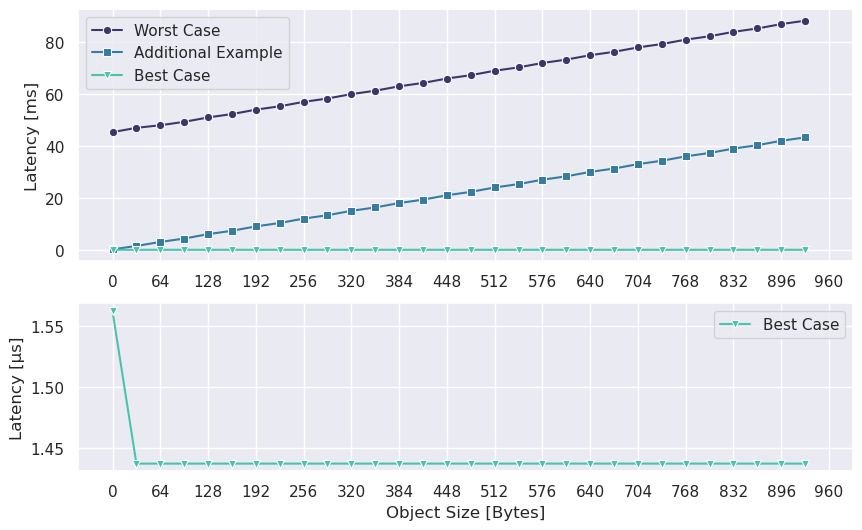

In [13]:
from util.plot import set_gird, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1]) 
ax = plt.subplot(gs[0])

unit = "ms"

if len(get_max2) != 0:
    get_max2_scaled = scale_data(get_max2, unit)
    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_case1) != 0:
    get_case1_scaled = scale_data(get_case1, unit)
    sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
    ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")

set_theme(3, 2)
ax = plt.subplot(gs[1])

# fig, ax = plt.subplots()
# fig.set_figheight(2.5)
# fig.set_figwidth(10)

unit = "µs"

#if len(get_max2) != 0:
#    get_max2_scaled = scale_data(get_max2, unit)
#    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

# if len(get_case1) != 0:
#     get_case1_scaled = scale_data(get_case1, unit)
#     sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
#     ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
save_plot("get_ref")